# Modeling: Gradient Boosting
Perform same gradient boosting as notebook 6 but use a different random state to
test whether overfitting was due to bad train test split

## Import packages

In [50]:
import joblib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.display import display
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import PLSRegression, PLSSVD

from sklearn.dummy import DummyRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_validate, KFold
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing, svm
from sklearn.metrics import r2_score, accuracy_score, mean_absolute_error

#Use to ignore convergence warnings
import warnings
from sklearn.exceptions import DataConversionWarning
from sklearn.exceptions import ConvergenceWarning
from sklearn.exceptions import FitFailedWarning
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import __version__ as sklearn_version
import datetime

import joblib
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)
warnings.filterwarnings(action='ignore', category=FitFailedWarning)


# pd.set_option('display.max_columns', None)
# pd.reset_option('max_rows')
# np.set_printoptions(threshold=sys.maxsize)

plt.style.use('dark_background')
plt.rcParams.update({"grid.linewidth":0.5, "grid.alpha":0.5})
sns.set(style='ticks', context='talk')

## Load X and y data sets

In [27]:
# import X and y training and test sets

X = pd.read_csv('../../data/train_test/X_alt')
y = pd.read_csv('../../data/train_test/y_alt')

X_train = pd.read_csv('../../data/train_test/X_train_74_26')

X_test = pd.read_csv('../../data/train_test/X_test_74_26')

y_train = pd.read_csv('../../data/train_test/y_train_alt_74_26')

y_test = pd.read_csv('../../data/train_test/y_test_alt+74_26')

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.26, random_state=72)

In [29]:
gb_pipe = Pipeline([('scaler', StandardScaler()), ('gb', GradientBoostingRegressor(random_state=42))])

In [30]:
gb_param_grid = {}

In [31]:
gb_grid = GridSearchCV(gb_pipe, gb_param_grid, cv=5)
gb_grid.fit(X_train, y_train)
gb_grid.best_score_, gb_grid.best_params_

(0.23176511999048185, {})

In [32]:
gb_param_grid = {'scaler':[None, StandardScaler()]}

In [33]:
gb_grid2 = GridSearchCV(gb_pipe, gb_param_grid, cv=5)
gb_grid2.fit(X_train, y_train)
gb_grid2.best_score_, gb_grid2.best_params_

(0.23176511999048185, {'scaler': StandardScaler()})

In [34]:
gb_pipe.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('gb', GradientBoostingRegressor(random_state=42))],
 'verbose': False,
 'scaler': StandardScaler(),
 'gb': GradientBoostingRegressor(random_state=42),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'gb__alpha': 0.9,
 'gb__ccp_alpha': 0.0,
 'gb__criterion': 'friedman_mse',
 'gb__init': None,
 'gb__learning_rate': 0.1,
 'gb__loss': 'ls',
 'gb__max_depth': 3,
 'gb__max_features': None,
 'gb__max_leaf_nodes': None,
 'gb__min_impurity_decrease': 0.0,
 'gb__min_impurity_split': None,
 'gb__min_samples_leaf': 1,
 'gb__min_samples_split': 2,
 'gb__min_weight_fraction_leaf': 0.0,
 'gb__n_estimators': 100,
 'gb__n_iter_no_change': None,
 'gb__random_state': 42,
 'gb__subsample': 1.0,
 'gb__tol': 0.0001,
 'gb__validation_fraction': 0.1,
 'gb__verbose': 0,
 'gb__warm_start': False}

In [35]:
feat_imp_1 = gb_grid.best_estimator_.named_steps.gb.feature_importances_
feat_imp_grid_1 = pd.Series(feat_imp_1, index=X_train.columns).sort_values(ascending=False)

feat_imp_2 = gb_grid2.best_estimator_.named_steps.gb.feature_importances_
feat_imp_grid_2 = pd.Series(feat_imp_2, index=X_train.columns).sort_values(ascending=False)

In [36]:
feat_imp_grid_1.head(20), feat_imp_grid_2.head(20)

(HWAC_MALE_ratio_2018                           0.281752
 HAAC_MALE_ratio_2017_2019_diff                 0.030579
 HS_TOT_2017_2018_pct_change                    0.026923
 HAA_MALE_ratio_2017_2019_diff                  0.025871
 NAC_FEMALE_ratio_2018_2019_diff                0.021042
 NHTOM_FEMALE_2017_2018_diff                    0.019970
 HBAC_MALE_ratio_2017_2018_pct_change           0.019290
 BACH_TOT_ratio_2017_2018_diff                  0.018488
 AQI_2017_2018_pct_change                       0.014673
 HIA_MALE_2018_2019_pct_change                  0.014557
 90% CI LB percent 0-17_2018                    0.013510
 COL_OR_ASSOC_TOT_ratio_2018_2019_pct_change    0.012944
 HAA_MALE_ratio_2018_2019_diff                  0.012878
 IA_FEMALE_ratio_2017_2019_pct_change           0.012813
 HAA_MALE_ratio_2017_2019_pct_change            0.012488
 NHAA_FEMALE_ratio_2017_2018_pct_change         0.011850
 NHIA_FEMALE_2018                               0.011387
 BACH_TOT_2017_2019_pct_change 

it appears that feature importance for scaled and none scaled are about the same; even though scores differ slightly. Also it seems that the first 10 features explain much of our model

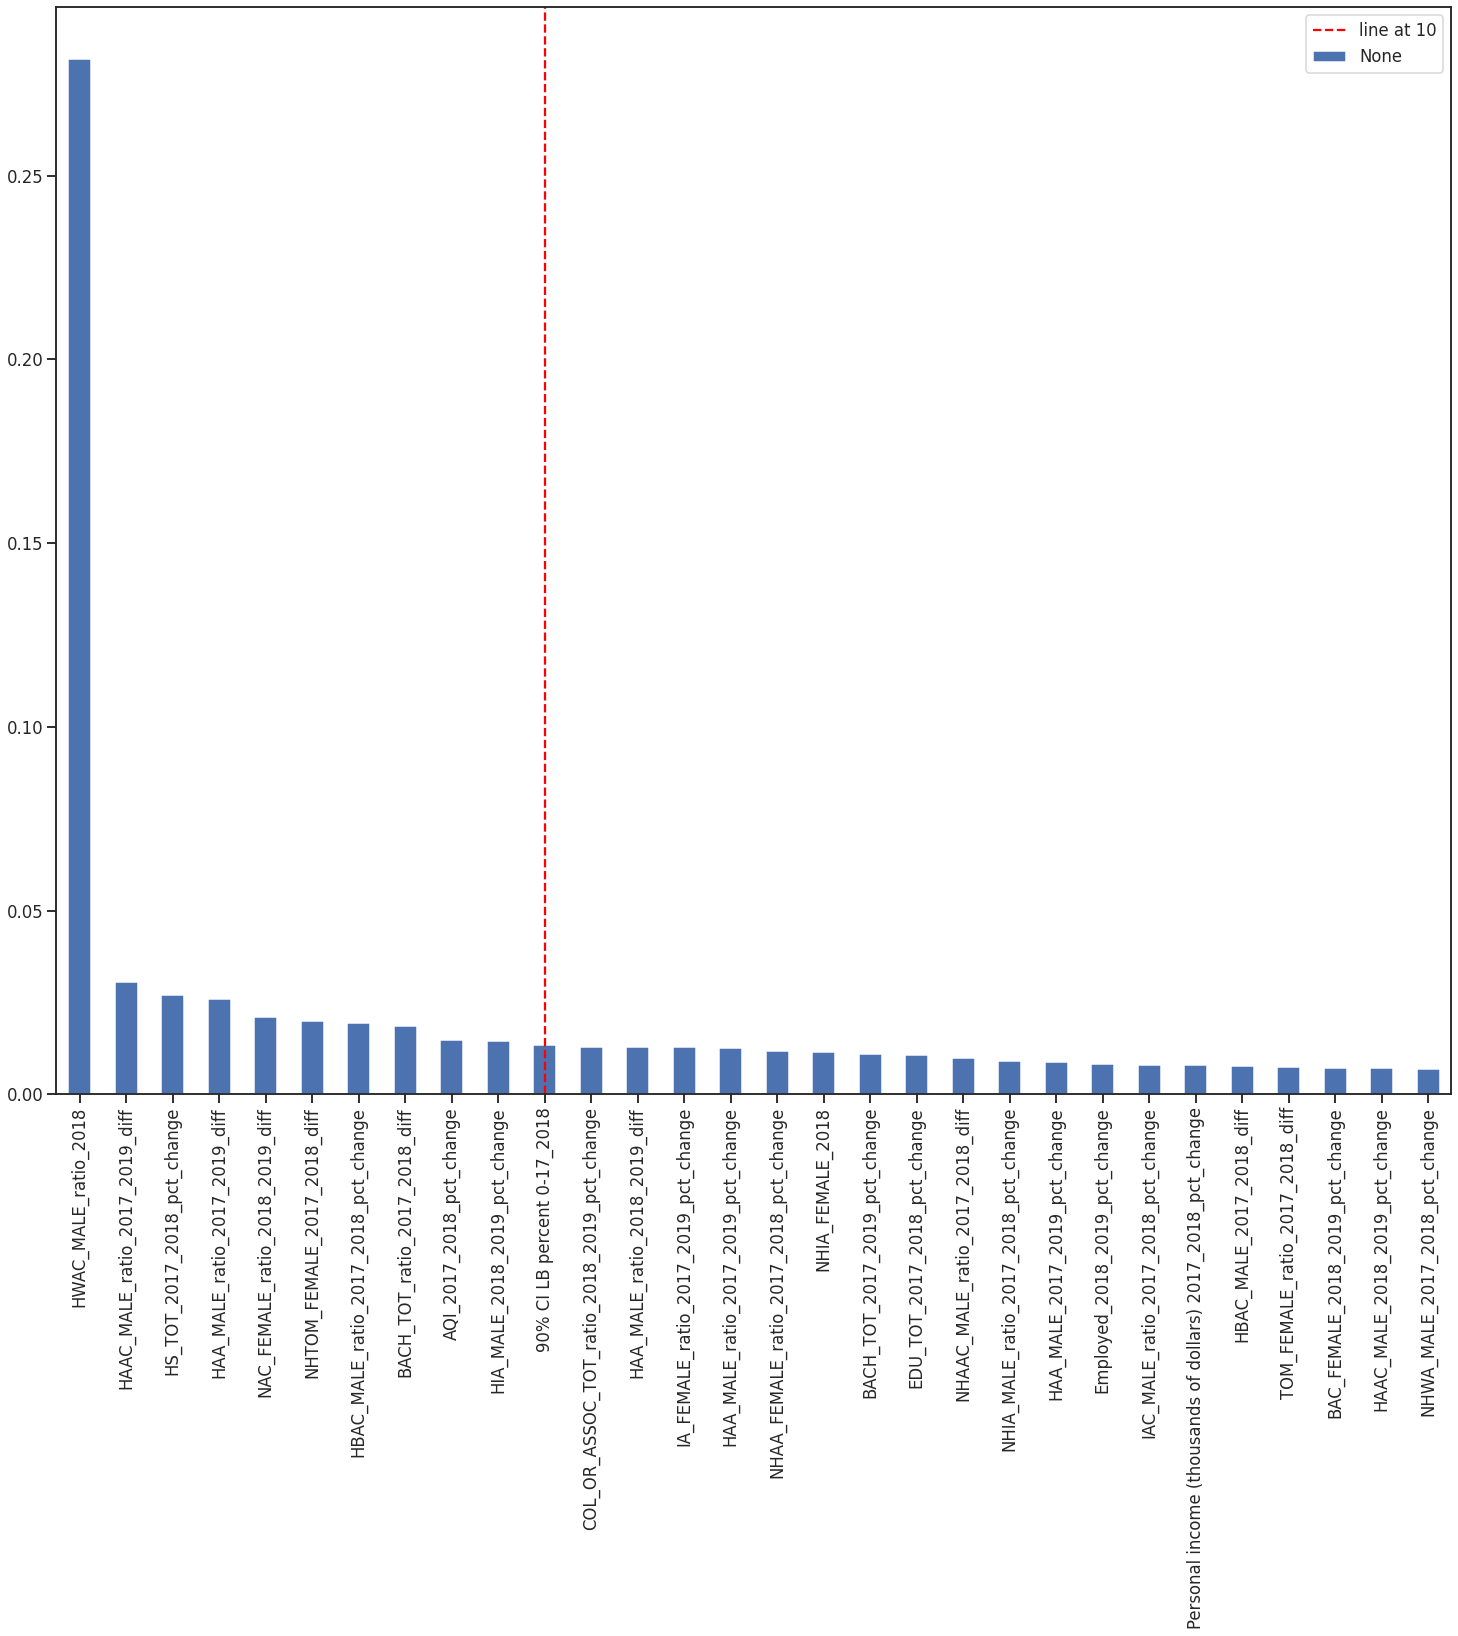

In [37]:
plt.figure(figsize=(25,20))
feat_imp_grid_1[:30].plot(kind='bar')
plt.axvline(x=10, label='line at 10', c='red', linestyle='--')
plt.legend()

# Try messing with gradient boosting with increment adding number of features

In [38]:
reduced_cols = feat_imp_grid_1[:20].index.tolist()
X_train_reduced = X_train[reduced_cols]
X_test_reduced = X_test[reduced_cols]
reduced_cols

['HWAC_MALE_ratio_2018',
 'HAAC_MALE_ratio_2017_2019_diff',
 'HS_TOT_2017_2018_pct_change',
 'HAA_MALE_ratio_2017_2019_diff',
 'NAC_FEMALE_ratio_2018_2019_diff',
 'NHTOM_FEMALE_2017_2018_diff',
 'HBAC_MALE_ratio_2017_2018_pct_change',
 'BACH_TOT_ratio_2017_2018_diff',
 'AQI_2017_2018_pct_change',
 'HIA_MALE_2018_2019_pct_change',
 '90% CI LB percent 0-17_2018',
 'COL_OR_ASSOC_TOT_ratio_2018_2019_pct_change',
 'HAA_MALE_ratio_2018_2019_diff',
 'IA_FEMALE_ratio_2017_2019_pct_change',
 'HAA_MALE_ratio_2017_2019_pct_change',
 'NHAA_FEMALE_ratio_2017_2018_pct_change',
 'NHIA_FEMALE_2018',
 'BACH_TOT_2017_2019_pct_change',
 'EDU_TOT_2017_2018_pct_change',
 'NHAAC_MALE_ratio_2017_2018_diff']

In [39]:
gb_param_grid = {'scaler':[StandardScaler()]}

In [40]:
gb_grid3 = GridSearchCV(gb_pipe, gb_param_grid, cv=5)
gb_grid3.fit(X_train_reduced, y_train)
gb_grid3.best_score_, gb_grid3.best_params_

(0.46445164914239206, {'scaler': StandardScaler()})

Reducing features signifiacntly imporved train score


In [41]:
mean_score = []
test_score = []
for num in range(1, 100):
    reduced_cols = feat_imp_grid_1[:num].index.tolist()
    X_train_reduced = X_train[reduced_cols]
    X_test_reduced = X_test[reduced_cols]
    gb_grid_tmp = GridSearchCV(gb_pipe, gb_param_grid, cv=5)
    gb_grid_tmp.fit(X_train_reduced, y_train)
    mean_score.append(gb_grid_tmp.best_score_)
    test_score.append(gb_grid_tmp.score(X_test_reduced, y_test))



In [42]:
max_index = mean_score.index(max(mean_score)) + 1
max(mean_score)

0.5118169846149022

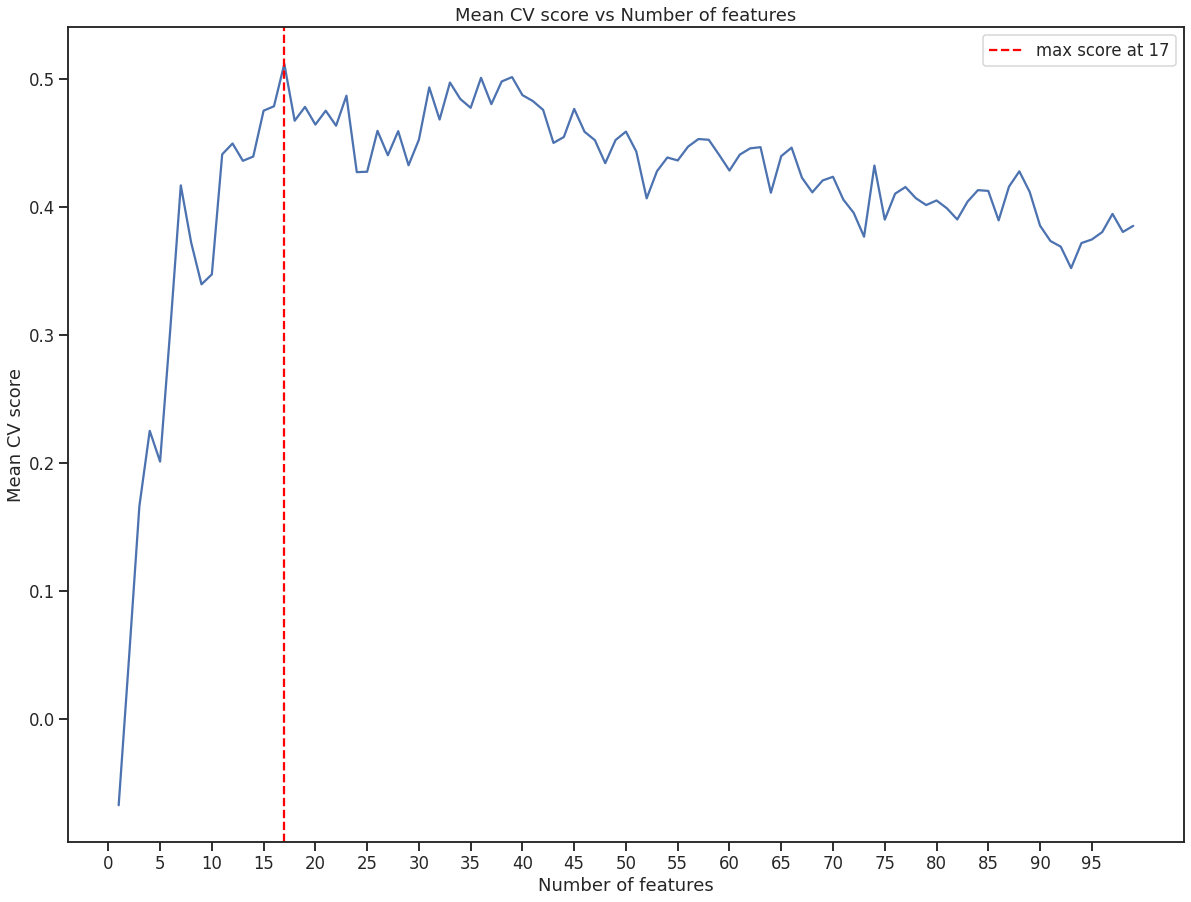

In [43]:
plt.figure(figsize=(20, 15))
sns.lineplot(x=np.arange(1, 100), y=mean_score)
plt.axvline(x=max_index, label='max score at {}'.format(max_index), color='red', linestyle='--')
plt.xticks(np.arange(0,100, 5))
plt.xlabel('Number of features')
plt.ylabel('Mean CV score')
plt.title('Mean CV score vs Number of features')
plt.legend();


Best number of features to have is 17 with a mean train score of .51 better than with previous notebooks train test split; less features even

In [44]:
reduced_cols = feat_imp_grid_1[:max_index].index.tolist()
X_train_reduced = X_train[reduced_cols]
X_test_reduced = X_test[reduced_cols]
reduced_cols

['HWAC_MALE_ratio_2018',
 'HAAC_MALE_ratio_2017_2019_diff',
 'HS_TOT_2017_2018_pct_change',
 'HAA_MALE_ratio_2017_2019_diff',
 'NAC_FEMALE_ratio_2018_2019_diff',
 'NHTOM_FEMALE_2017_2018_diff',
 'HBAC_MALE_ratio_2017_2018_pct_change',
 'BACH_TOT_ratio_2017_2018_diff',
 'AQI_2017_2018_pct_change',
 'HIA_MALE_2018_2019_pct_change',
 '90% CI LB percent 0-17_2018',
 'COL_OR_ASSOC_TOT_ratio_2018_2019_pct_change',
 'HAA_MALE_ratio_2018_2019_diff',
 'IA_FEMALE_ratio_2017_2019_pct_change',
 'HAA_MALE_ratio_2017_2019_pct_change',
 'NHAA_FEMALE_ratio_2017_2018_pct_change',
 'NHIA_FEMALE_2018']

In [45]:
gb_param_grid = {'scaler':[StandardScaler()]}

In [46]:
gb_grid4 = GridSearchCV(gb_pipe, gb_param_grid, cv=5)
gb_grid4.fit(X_train_reduced, y_train)
gb_grid4.best_score_, gb_grid4.best_params_

(0.5118169846149022, {'scaler': StandardScaler()})

In [51]:
# try nested cross validation
outer_cv = KFold(n_splits=5, shuffle=True, random_state=58)
cv_results = cross_validate(gb_grid4, X=X_train_reduced, y=y_train, cv=outer_cv)
cv_score = np.mean(cv_results['test_score'])
cv_score


0.563306506829717

In [52]:
gb_grid4.score(X_test_reduced, y_test)

0.2624832068558185

In [53]:
'std dev', gb_grid4.cv_results_['std_test_score'][gb_grid4.best_index_]

('std dev', 0.10291962516699778)

Even with a different train test split we have it shown that we are overfitting.
I believe that this is because gradient boosting is known to easily overfit the data and because of this we would need to tune
the hyperparamters to reduce the overfitting.

Also to note that the train and test score are more than 2 standard deviations away which means that this is score is not likely

### do hyperaparmeters tuning to reduce overfitting
* after just run the test score evaluation just once